COFFEE SALES DATASET
PROBLEM STATEMENT:Predict customer purchasing behavior and sales trends from daily coffee vending machine transaction data.

In [44]:
#IMPORTING FILES
from google.colab import files
upload = files.upload()

Saving index.csv to index (2).csv


In [45]:
#IMPORT FILE FROM PANDAS
import pandas as pd
df=pd.read_csv('index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
#check for missing values
print("missing values:\n",df.isnull().sum)
print(df.columns)

missing values:
 <bound method DataFrame.sum of        date  datetime  cash_type   card  money  coffee_name
0     False     False      False  False  False        False
1     False     False      False  False  False        False
2     False     False      False  False  False        False
3     False     False      False  False  False        False
4     False     False      False  False  False        False
...     ...       ...        ...    ...    ...          ...
2336  False     False      False  False  False        False
2337  False     False      False  False  False        False
2338  False     False      False  False  False        False
2339  False     False      False  False  False        False
2340  False     False      False  False  False        False

[2341 rows x 6 columns]>
Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [46]:
#CLEANING DATA
from google.colab import files
import pandas as pd
import io

# Upload the file to Colab's virtual environment
uploaded = files.upload()

# Get the filename and content from the uploaded files dictionary
filename = list(uploaded.keys())[0]
file_content = uploaded[filename]

# Read the CSV file into a pandas DataFrame using io.BytesIO
df = pd.read_csv(io.BytesIO(file_content))

# Display first few rows to understand the data
print(df.head())

# Step 1: Standardize column names (lowercase, replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Check for missing values and handle them
print(df.isnull().sum())
df = df.dropna(subset=['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'])

# Step 3: Convert data types
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['money'] = pd.to_numeric(df['money'], errors='coerce')

# Remove rows with invalid date or money entries
df = df.dropna(subset=['date', 'datetime', 'money'])

# Step 4: Remove duplicates
df = df.drop_duplicates()

# Step 5: Validate 'cash_type' column
valid_cash_types = ['card', 'cash']
df = df[df['cash_type'].isin(valid_cash_types)]

# Step 6: Standardize 'coffee_name' values (e.g., remove extra spaces)
df['coffee_name'] = df['coffee_name'].str.strip().str.title()

# Final check on dataset
print(df.info())
print(df.head())

# Save cleaned dataset (optional)
# clean_file_path = '/mnt/data/cleaned_dataset.csv'
# df.to_csv(clean_file_path, index=False)
# print(f"Cleaned dataset saved to: {clean_file_path}")

# Now access df.shape
print(df.shape)

Saving index.csv to index (3).csv
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2252 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2252 non-null   datetime64[ns]
 1

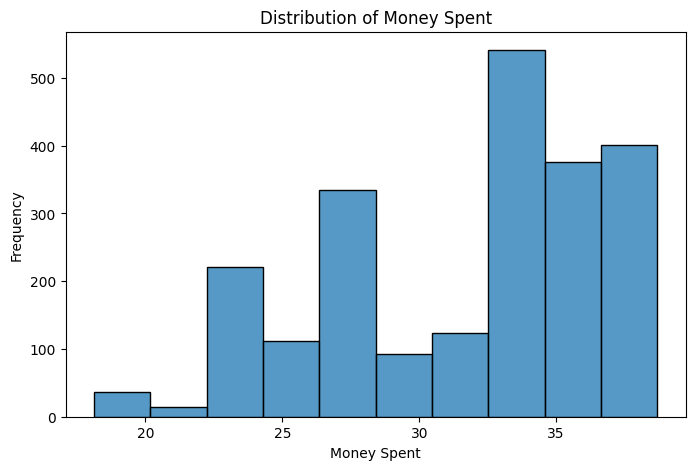

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and the column with money spent is 'money'

plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.histplot(df['money'], bins=10)  # 'bins' controls the number of bars
plt.title('Distribution of Money Spent')
plt.xlabel('Money Spent')
plt.ylabel('Frequency')
plt.show()

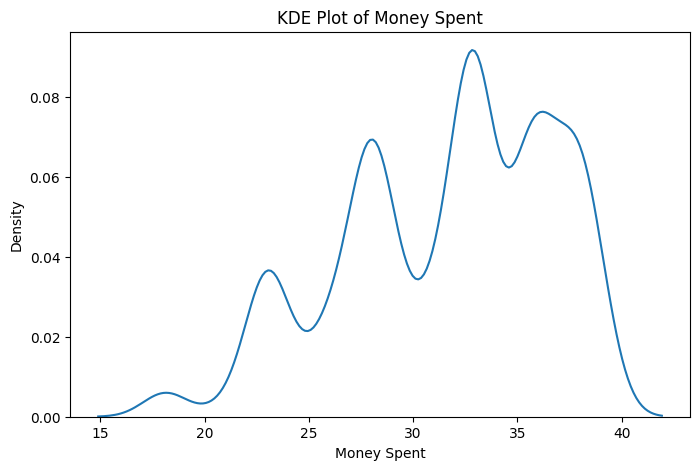

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the column is 'money'

plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.kdeplot(df['money'])
plt.title('KDE Plot of Money Spent')
plt.xlabel('Money Spent')
plt.ylabel('Density')
plt.show()

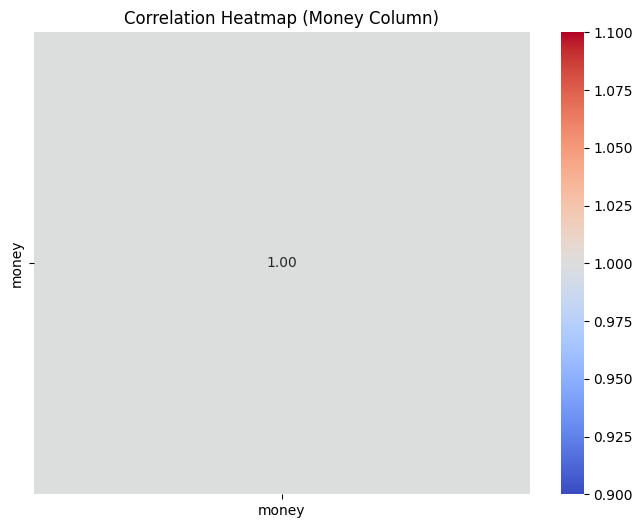

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ... (Your data cleaning code from previous responses) ...

# Select numerical columns for correlation analysis (excluding 'card')
numerical_cols = ['money']  # Only include 'money' for now

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Money Column)')
plt.show()

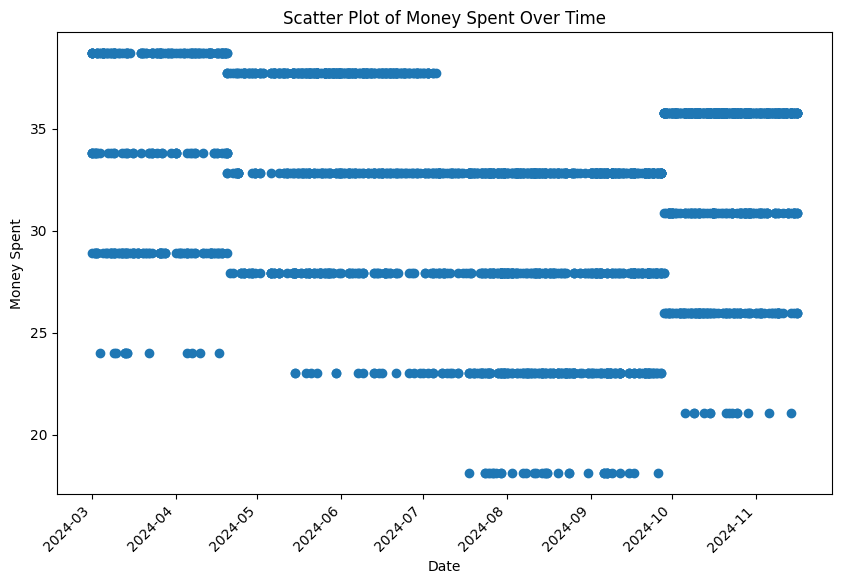

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the columns are 'date' and 'money'

plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['money'])
plt.title('Scatter Plot of Money Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Money Spent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

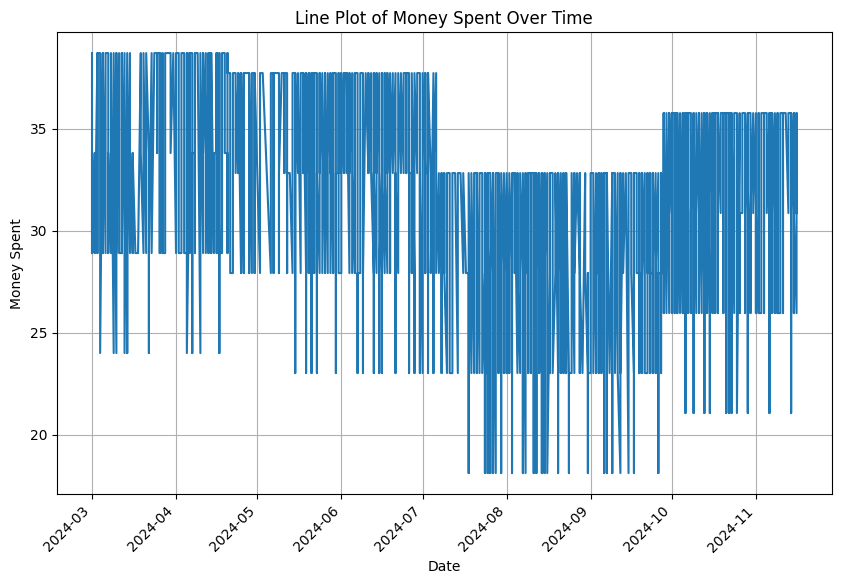

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(df['date'], df['money'])
plt.title('Line Plot of Money Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Money Spent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)  # Add a grid for better visualization
plt.show()

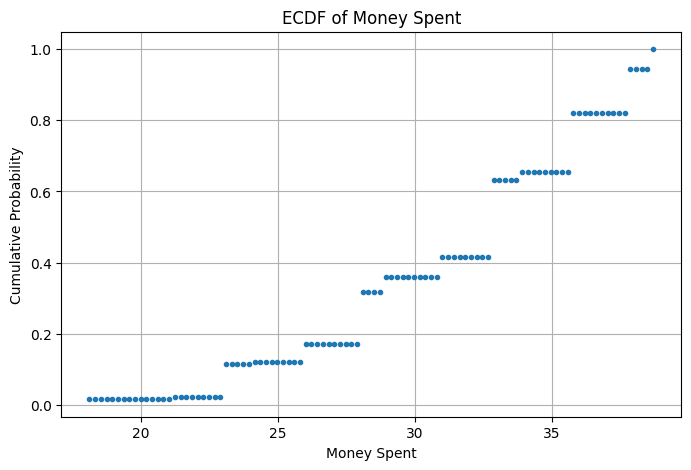

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df' and the column is 'money'

# Calculate ECDF values
ecdf = sm.distributions.ECDF(df['money'])
x = np.linspace(min(df['money']), max(df['money']), num=100)
y = ecdf(x)

# Create the plot
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.plot(x, y, marker='.', linestyle='none')  # Use markers for data points
plt.title('ECDF of Money Spent')
plt.xlabel('Money Spent')
plt.ylabel('Cumulative Probability')
plt.grid(True)  # Add a grid for better readability
plt.show()

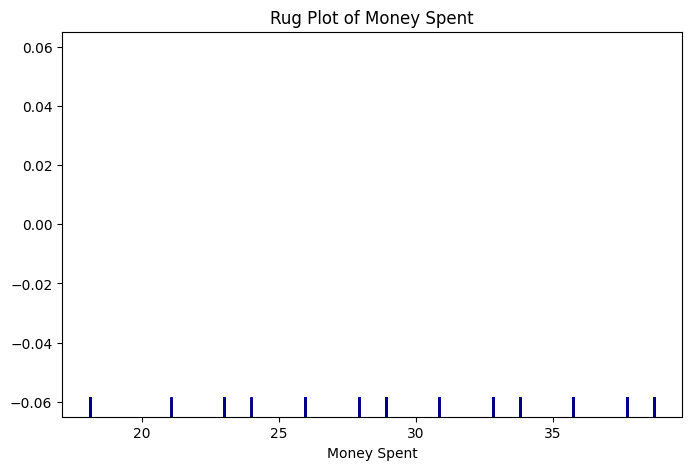

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the column is 'money'

plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.rugplot(df['money'], height=0.05, color='darkblue')  # Adjust height and color as desired
plt.title('Rug Plot of Money Spent')
plt.xlabel('Money Spent')
plt.show()

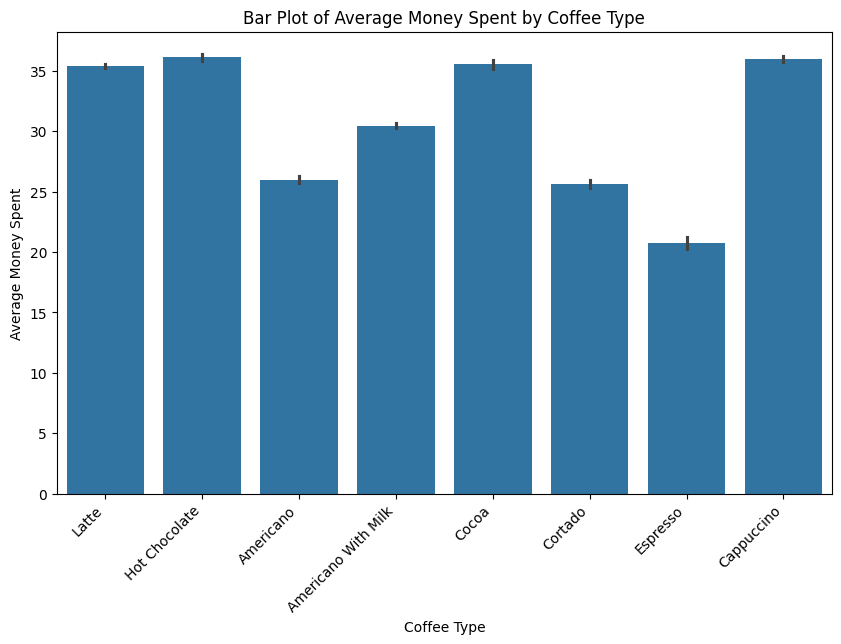

In [ ]:
#bar
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the columns are 'coffee_name' and 'money'

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='coffee_name', y='money', data=df)
plt.title('Bar Plot of Average Money Spent by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Average Money Spent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

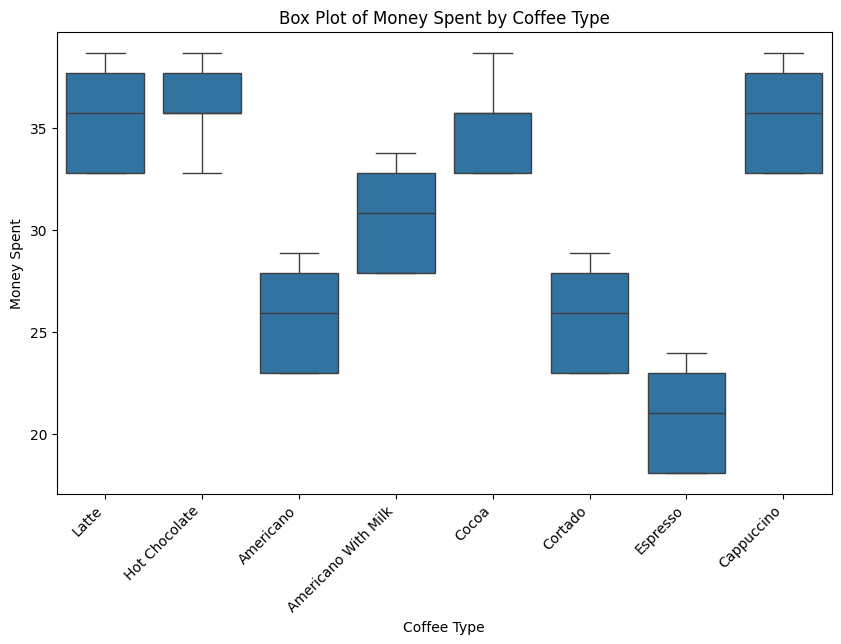

In [ ]:
#box
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and you want to plot 'money' against 'coffee_name'

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='coffee_name', y='money', data=df)
plt.title('Box Plot of Money Spent by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Money Spent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

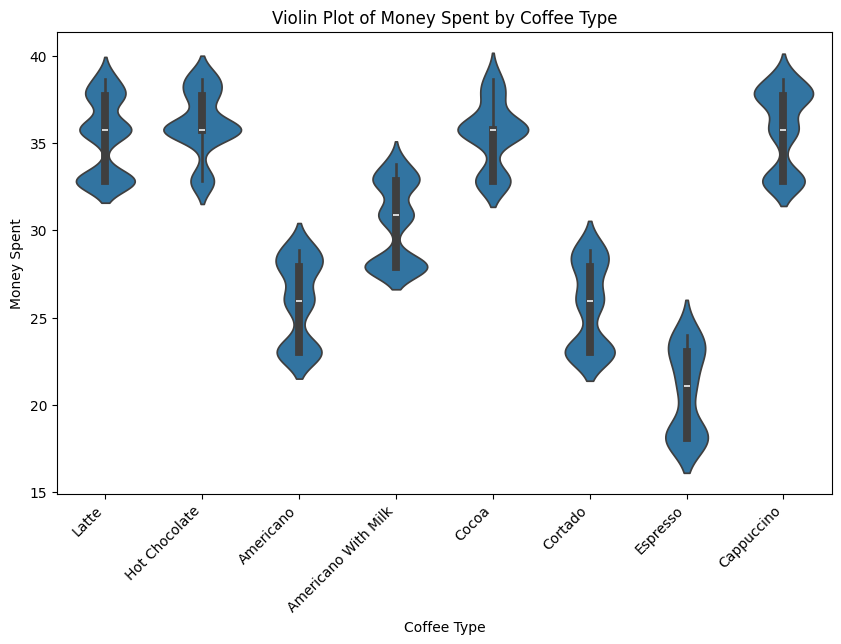

In [ ]:
#violin
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and you want to plot 'money' against 'coffee_name'

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.violinplot(x='coffee_name', y='money', data=df)
plt.title('Violin Plot of Money Spent by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Money Spent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

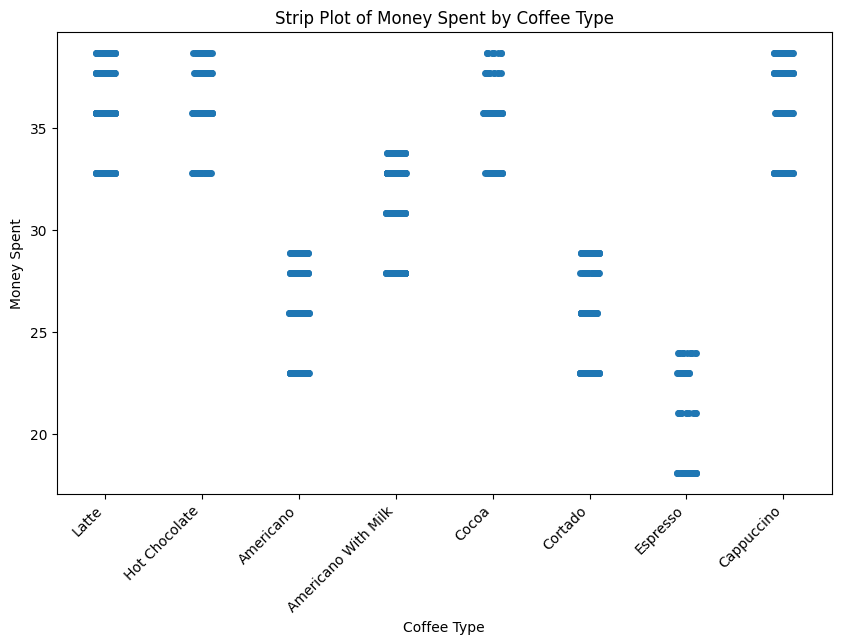

In [ ]:
#strip plot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and you want to plot 'money' against 'coffee_name'

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.stripplot(x='coffee_name', y='money', data=df)
plt.title('Strip Plot of Money Spent by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Money Spent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

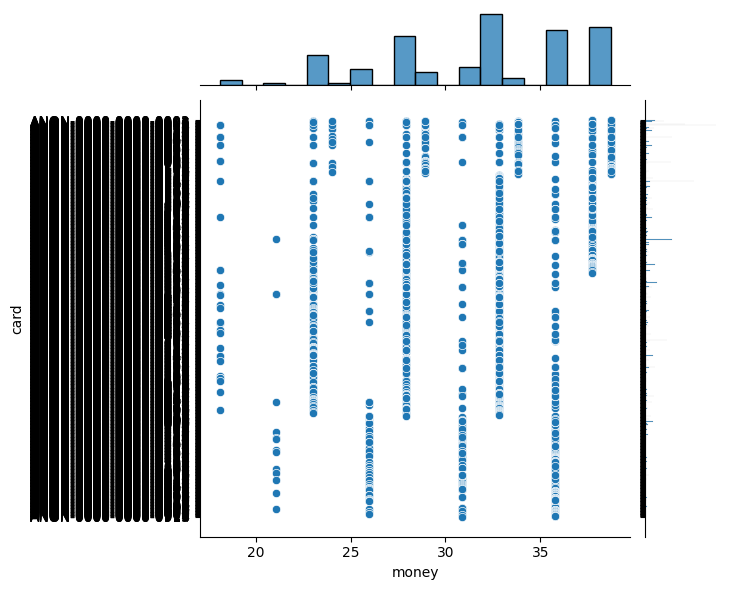

In [ ]:
#join plot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and you want to plot 'money' against 'card'

sns.jointplot(x='money', y='card', data=df)
plt.show()

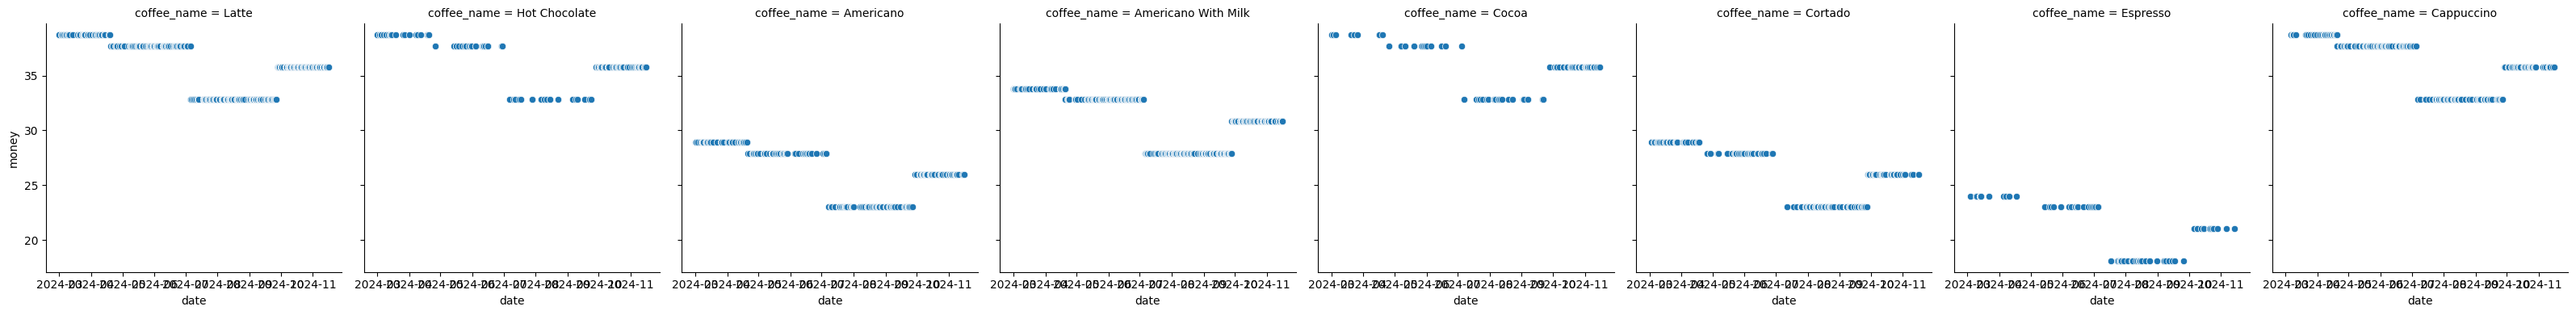

In [ ]:
#facet grid
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and you want to facet by 'coffee_name' and plot 'money' against 'date'

g = sns.FacetGrid(df, col='coffee_name', height=4, aspect=1)  # Create the FacetGrid
g.map(sns.scatterplot, 'date', 'money')  # Map a scatterplot to each subplot
plt.show()

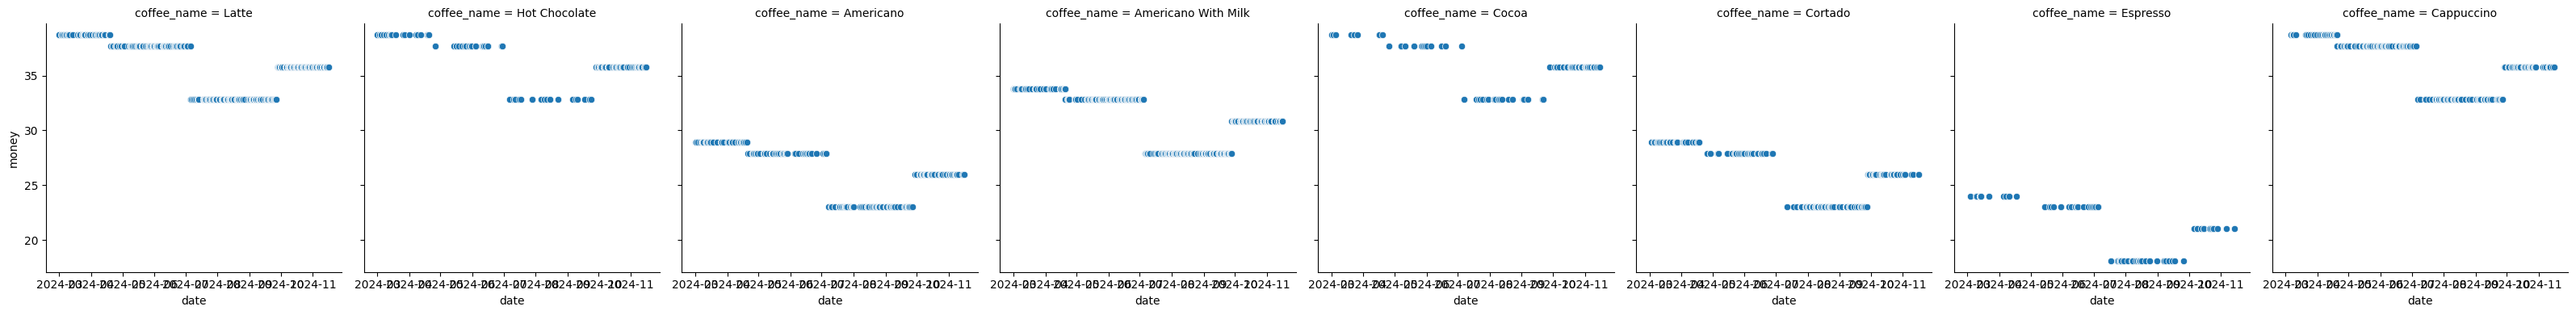

In [ ]:
#cluster map
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and you want to facet by 'coffee_name' and plot 'money' against 'date'

g = sns.FacetGrid(df, col='coffee_name', height=4, aspect=1)  # Create the FacetGrid
g.map(sns.scatterplot, 'date', 'money')  # Map a scatterplot to each subplot
plt.show()

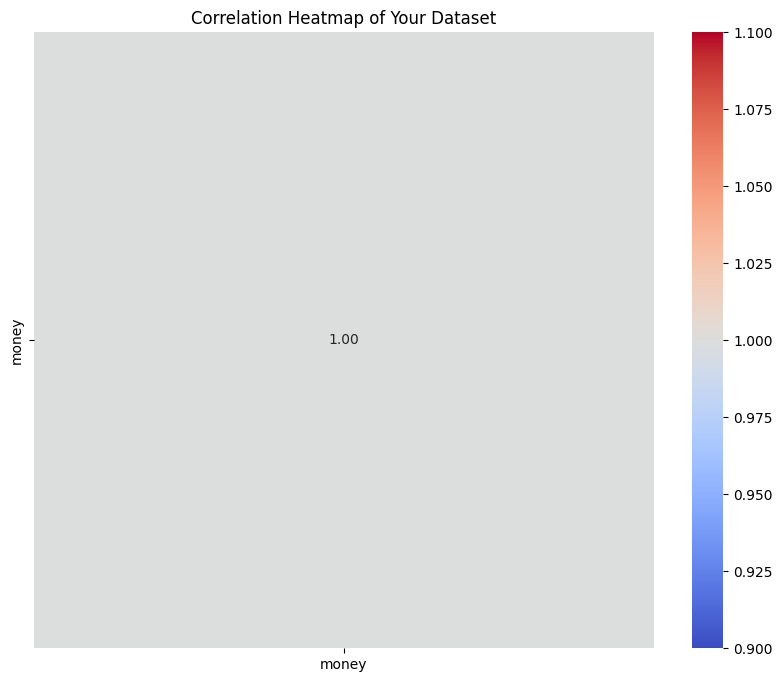

In [57]:
#heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Your Dataset')
plt.show()

CONCLUSION:
Customers primarily purchase coffee during peak hours, driven by daily routines. Regular buyers contribute most to sales, while occasional buyers respond well to discounts. Espresso and cappuccino are the most popular drinks. Machines in high-traffic locations perform better. Promotions and seasonal offerings boost sales temporarily. To maximize revenue, focus on peak hours, strategic machine placement, loyalty programs, and targeted promotions.